# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]

In [5]:
print(all_subjects)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '2002']


In [6]:
X_all, y_all, subj_all = load_all_data(all_subjects)

Loading 1001's data


E:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [8]:
%run preprocessing.ipynb

In [9]:
print(X_all.shape, y_all.shape)

(26716, 3) (26716,)


In [10]:
X_all

array([[-2.99275204e-01, -9.03566837e-01, -6.10765714e-04],
       [-3.04649949e-01, -9.05032653e-01,  4.64181969e-03],
       [-3.01229663e-01, -9.01612347e-01,  2.68736939e-03],
       ...,
       [-8.85488163e-01,  1.68082724e-01,  2.51024714e-01],
       [-9.08941531e-01,  2.15478163e-01,  3.25293837e-01],
       [-9.29463367e-01, -8.44078224e-02,  2.32946041e-01]])

# Group Data by Label and Normalize Data

In [11]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [12]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [13]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, all_subjects, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [14]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [15]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26716, 3) (26716,)


In [17]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26716, 3) (26716,)


# Apply PCA

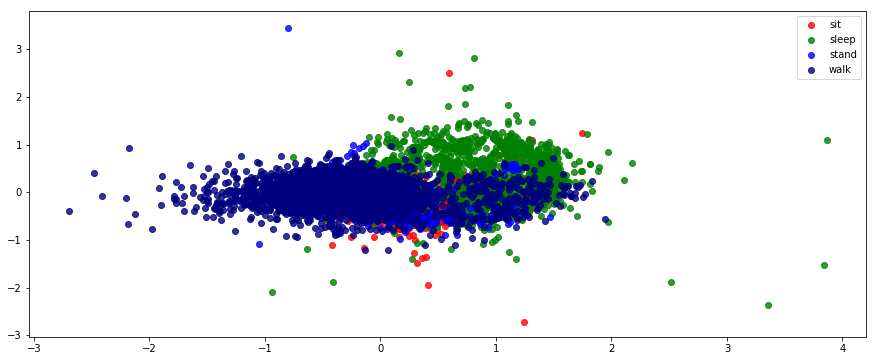

In [18]:
# apply PCA to X_all and rpy
X_pca, pca = apply_pca(X_all, y_all, label_list)
# rpy_pca, pca = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [19]:
# print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

In [20]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(X_pca, y_all, subj_all, all_subjects, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

0 0 (315, 60, 3)
0 1 (313, 60, 3)
0 2 (320, 60, 3)
0 3 (315, 60, 3)
0 4 (315, 60, 3)
0 5 (315, 60, 3)
0 6 (314, 60, 3)
0 7 (314, 60, 3)
0 8 (322, 60, 3)
0 9 (315, 60, 3)
0 10 (315, 60, 3)
0 11 (315, 60, 3)
0 12 (315, 60, 3)
1 0 (320, 60, 3)
1 1 (309, 60, 3)
1 2 (308, 60, 3)
1 3 (127, 60, 3)
1 4 (315, 60, 3)
1 5 (313, 60, 3)
1 6 (315, 60, 3)
1 7 (315, 60, 3)
1 8 (315, 60, 3)
1 9 (322, 60, 3)
1 10 (315, 60, 3)
1 11 (315, 60, 3)
1 12 (315, 60, 3)
2 0 (494, 60, 3)
2 1 (501, 60, 3)
2 2 (502, 60, 3)
2 3 (502, 60, 3)
2 4 (500, 60, 3)
2 5 (502, 60, 3)
2 6 (502, 60, 3)
2 7 (501, 60, 3)
2 8 (502, 60, 3)
2 9 (502, 60, 3)
2 10 (501, 60, 3)
2 11 (513, 60, 3)
2 12 (500, 60, 3)
3 0 (800, 60, 3)
3 1 (650, 60, 3)
3 2 (657, 60, 3)
3 3 (683, 60, 3)
3 4 (595, 60, 3)
3 5 (662, 60, 3)
3 6 (651, 60, 3)
3 7 (688, 60, 3)
3 8 (832, 60, 3)
3 9 (644, 60, 3)
3 10 (800, 60, 3)
3 11 (614, 60, 3)
3 12 (843, 60, 3)


In [21]:
print(X_pure.shape, y_pure.shape)

(23648, 180) (23648,)


# Reshape Data (Impure Label)

In [22]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [23]:
print(X_impure.shape, y_impure.shape)

(26657, 180) (26657,)


# Split Train and Test Set

In [24]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(21325, 180)
(5332, 180)


In [25]:
print(X_train.shape)
print(X_test.shape)

(18918, 180)
(4730, 180)


# K-Nearest Neighbors

In [27]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [28]:
filename = basepath + 'model/knn_model_normal_people.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [29]:
y_pred = nn_model.predict(X_test)

In [30]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [31]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [32]:
%run eval_score.ipynb

In [33]:
LABELS = ['sit','sleep','stand','walk']

0.8052854122621564


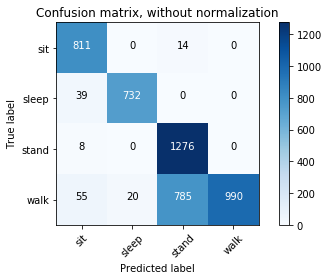

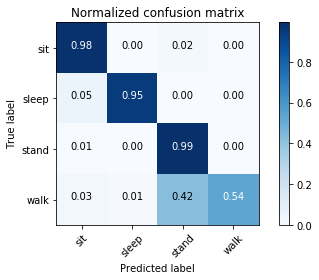

              precision    recall  f1-score   support

         sit       0.89      0.98      0.93       825
       sleep       0.97      0.95      0.96       771
       stand       0.61      0.99      0.76      1284
        walk       1.00      0.54      0.70      1850

   micro avg       0.81      0.81      0.81      4730
   macro avg       0.87      0.87      0.84      4730
weighted avg       0.87      0.81      0.80      4730



In [34]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.8158289572393098


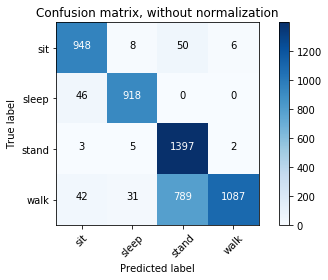

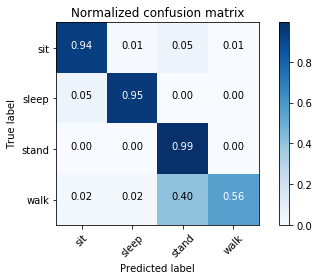

              precision    recall  f1-score   support

         sit       0.91      0.94      0.92      1012
       sleep       0.95      0.95      0.95       964
       stand       0.62      0.99      0.77      1407
        walk       0.99      0.56      0.71      1949

   micro avg       0.82      0.82      0.82      5332
   macro avg       0.87      0.86      0.84      5332
weighted avg       0.87      0.82      0.81      5332



In [35]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [36]:
%run classifier_alg.ipynb

In [39]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
#     'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
#     'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
#     'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

In [40]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_pca_1 = df_rpy_1[cols] # normal_people

In [ ]:
xyz_pca = np.array(df_pca.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [ ]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [ ]:
xyz_pca.shape, df_pca.shape

In [ ]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [ ]:
walk_pred

In [ ]:
walk_pred = np.array(walk_pred)

walk_pred.shape

In [ ]:
walk_actual = np.array([3 if (df_rpy.loc[i, 'label']==3) else 0 for i in range(len(df_rpy))])

walk_actual.shape

In [ ]:
print(walk_actual)

## Walk Algorithm Evaluation

In [85]:
walk_lbl = ['NaN','walk']

0.8999908583965628


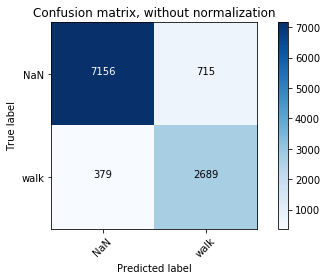

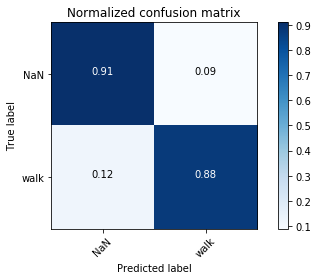

              precision    recall  f1-score   support

         NaN       0.95      0.91      0.93      7871
        walk       0.79      0.88      0.83      3068

   micro avg       0.90      0.90      0.90     10939
   macro avg       0.87      0.89      0.88     10939
weighted avg       0.90      0.90      0.90     10939



In [86]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [87]:
X_test_new = get_inverse_X(X_test)

X_test_new

array([[[ 0.96,  0.02,  0.13],
        [ 0.87,  0.02,  0.19],
        [ 0.84, -0.05,  0.19],
        ...,
        [ 1.11,  0.13,  0.23],
        [ 0.91, -0.06,  0.21],
        [ 0.88, -0.05,  0.24]],

       [[-0.55, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.55, -0.61,  0.45],
        ...,
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45]],

       [[-0.92, -0.13,  0.  ],
        [-0.81, -0.14,  0.02],
        [-1.17, -0.28, -0.  ],
        ...,
        [-1.07, -0.28, -0.07],
        [-0.73, -0.09, -0.05],
        [-0.83, -0.13, -0.03]],

       ...,

       [[-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        ...,
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41]],

       [[-1.04, -0.22, -0.08],
        [-0.9 , -0.15, -0.05],
        [-0.92, -0.2 , -0.04],
        ...,
        [-1.01, -0.18,  0.01],
        [-0.96, -0.22, -0.01],
        [-0.92,

In [88]:
walk_pred = classify_walk_2(X_test_new)

In [90]:
y_pred_new = combine_2(X_test_new, y_pred)

0.9379238393322901


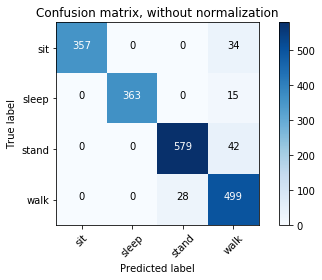

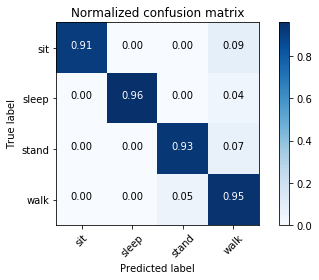

              precision    recall  f1-score   support

         sit       1.00      0.91      0.95       391
       sleep       1.00      0.96      0.98       378
       stand       0.95      0.93      0.94       621
        walk       0.85      0.95      0.89       527

   micro avg       0.94      0.94      0.94      1917
   macro avg       0.95      0.94      0.94      1917
weighted avg       0.94      0.94      0.94      1917



In [92]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [93]:
%run test_model.ipynb

In [94]:
filename = basepath + 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [95]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

call_functions(all_subjects, pca)

Loading 1001's data


KeyboardInterrupt: 

Loading 3001's data
Finished prediction


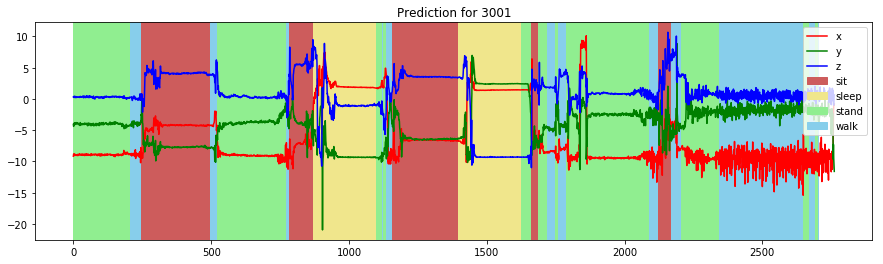

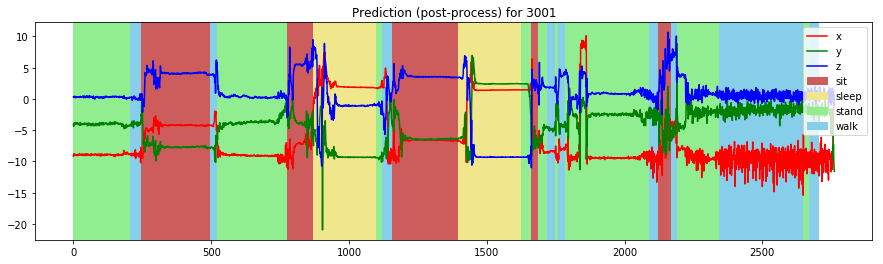

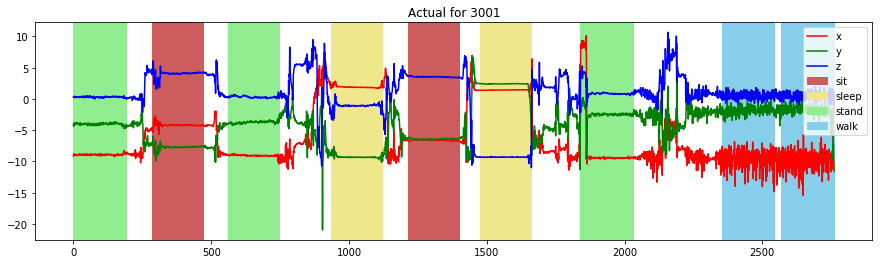

Loading 3002's data
Finished prediction


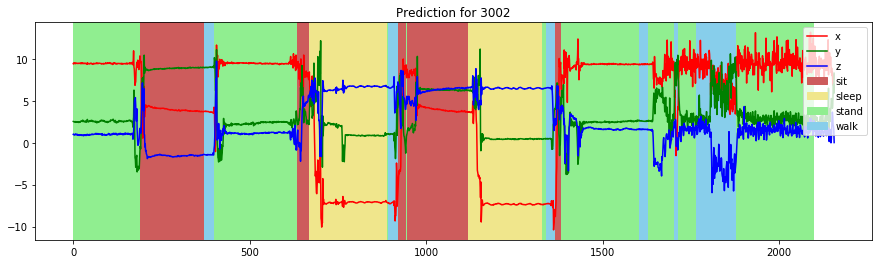

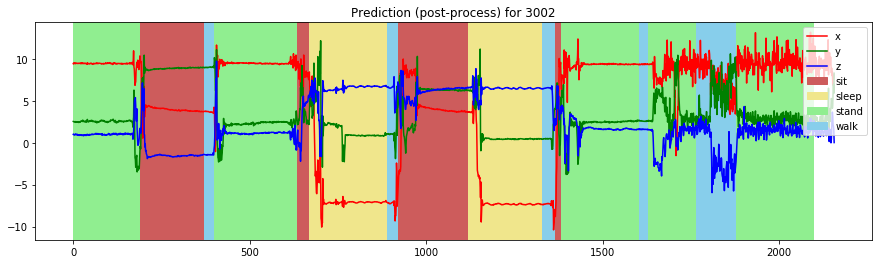

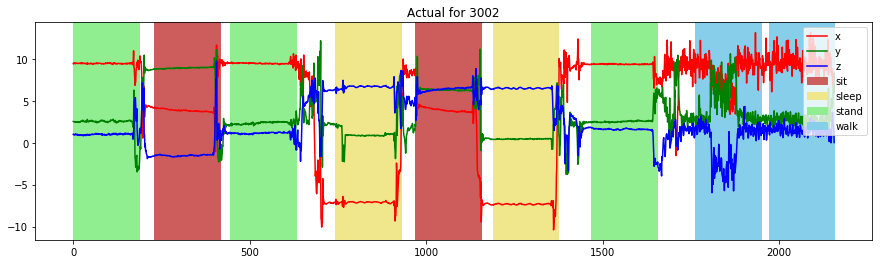

Loading 3003's data
Finished prediction


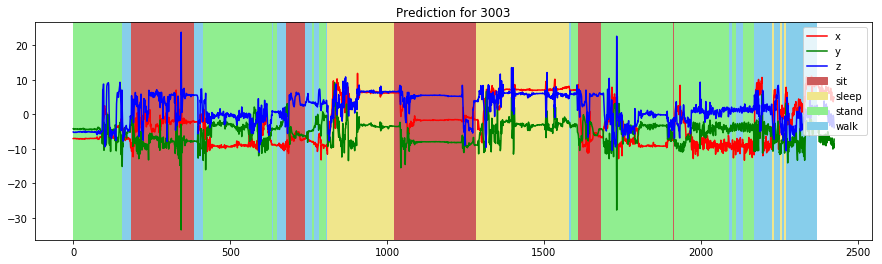

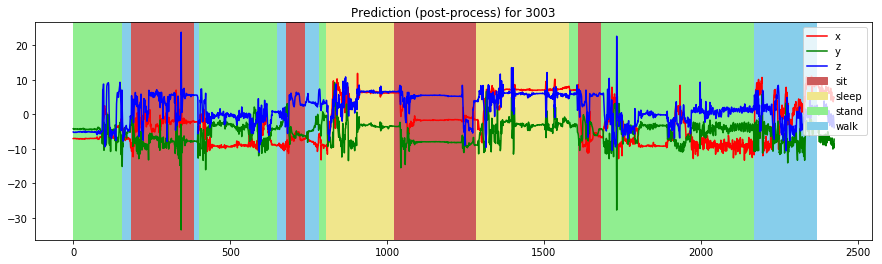

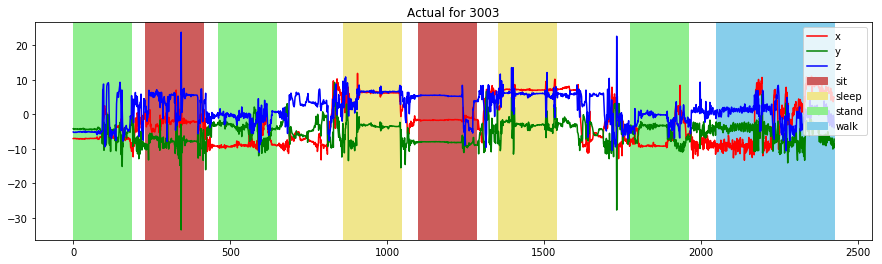

Loading 3004's data
Finished prediction


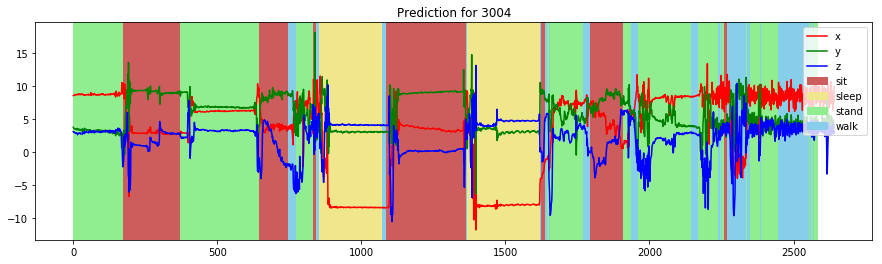

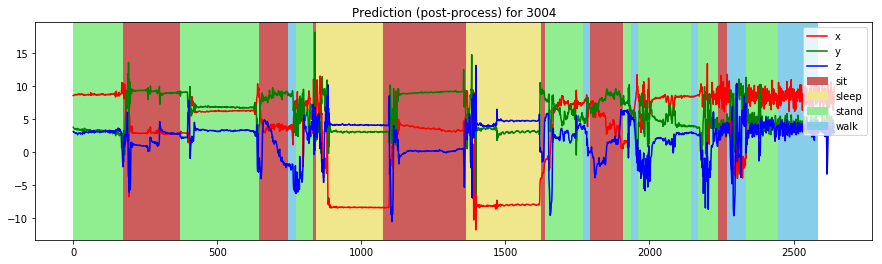

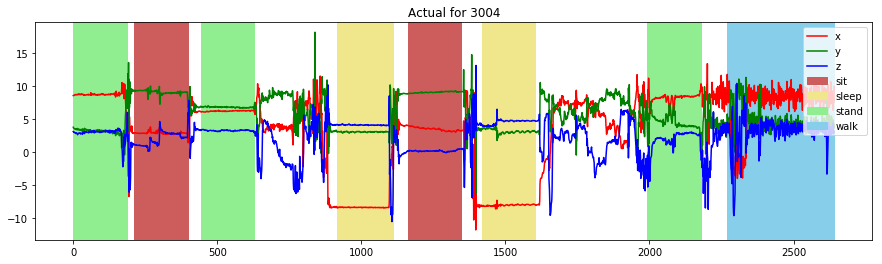

Loading 3005's data
Finished prediction


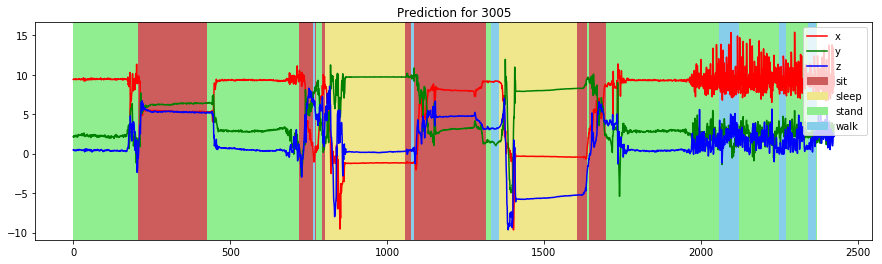

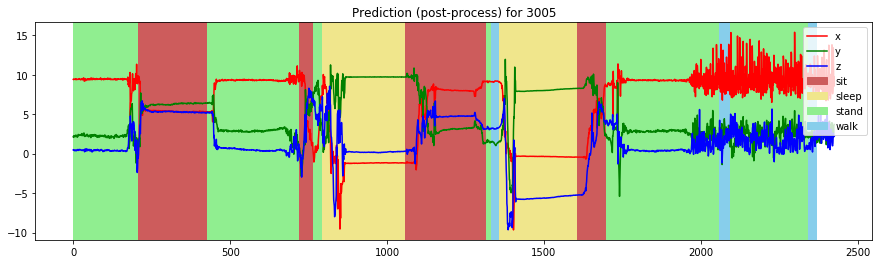

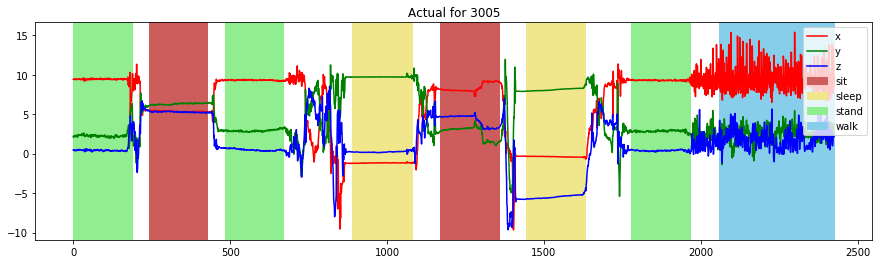

In [96]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects, pca_p)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
X_vis_imp = pd.DataFrame(X_vis_imp)

df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
cols = ['x','y','z']
df_test[cols]

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()